In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import os

# Question 2: Social Network Analysis with the Facebook100 Dataset

In [2]:
def plot_degree_distribution(graph, network_name):
    degrees = [d for _, d in graph.degree()]
    plt.hist(degrees, bins=range(1, max(degrees)+1), density=True, alpha=0.75, edgecolor='black')
    plt.title(f"Degree Distribution: {network_name}")
    plt.xlabel("Degree")
    plt.ylabel("Frequency")
    plt.grid(True)
    plt.show()

In [3]:
def compute_clustering_coefficients(graph):
    global_clustering = nx.transitivity(graph)  # Global clustering coefficient
    mean_local_clustering = nx.average_clustering(graph)  # Mean local clustering coefficient
    return global_clustering, mean_local_clustering

In [4]:
def compute_edge_density(graph):
    num_edges = graph.number_of_edges()
    num_nodes = graph.number_of_nodes()
    density = num_edges / (num_nodes * (num_nodes - 1) / 2)
    return density

In [5]:

def plot_degree_vs_clustering(graph, network_name):
    degrees = dict(graph.degree())
    local_clustering = nx.clustering(graph)

    x = list(degrees.values())
    y = list(local_clustering.values())

    plt.scatter(x, y, alpha=0.6)
    plt.title(f"Degree vs Local Clustering Coefficient: {network_name}")
    plt.xlabel("Degree")
    plt.ylabel("Local Clustering Coefficient")
    plt.grid(True)
    plt.show()

In [6]:
def analyze_network(graph, network_name):
    print(f"Analyzing {network_name}...")
    
    # Plot degree distribution
    plot_degree_distribution(graph, network_name)

    # Compute clustering coefficients
    global_clustering, mean_local_clustering = compute_clustering_coefficients(graph)
    print(f"Global Clustering Coefficient: {global_clustering}")
    print(f"Mean Local Clustering Coefficient: {mean_local_clustering}")

    # Compute edge density
    density = compute_edge_density(graph)
    print(f"Edge Density: {density}")

    # Plot degree vs local clustering coefficient
    plot_degree_vs_clustering(graph, network_name)

Analyzing Caltech...


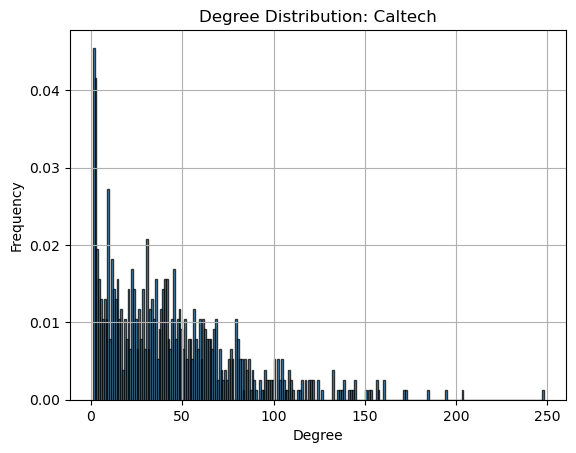

Global Clustering Coefficient: 0.2912826901150874
Mean Local Clustering Coefficient: 0.40929439048517224
Edge Density: 0.05640442132639792


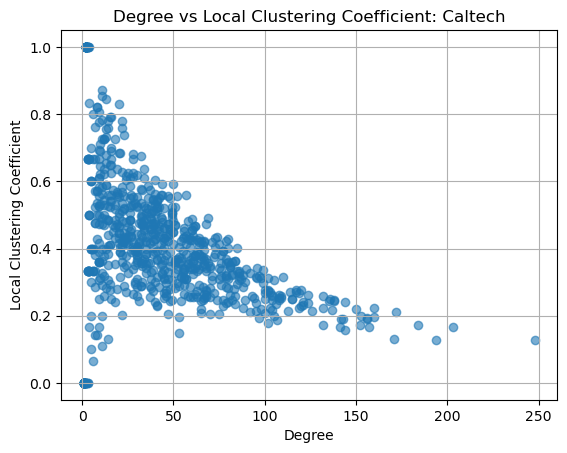

Analyzing MIT...


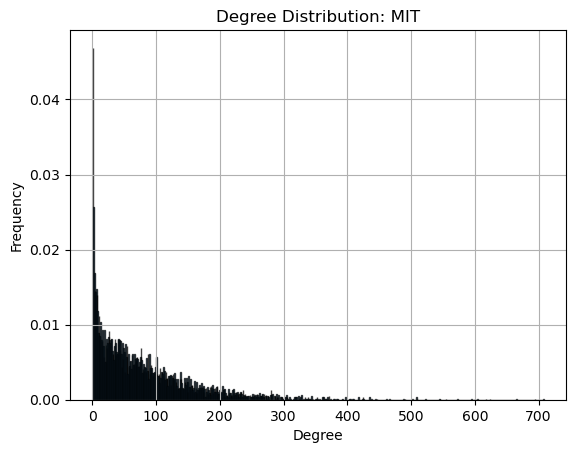

Global Clustering Coefficient: 0.18028845093502427
Mean Local Clustering Coefficient: 0.271218741950132
Edge Density: 0.012118119495041378


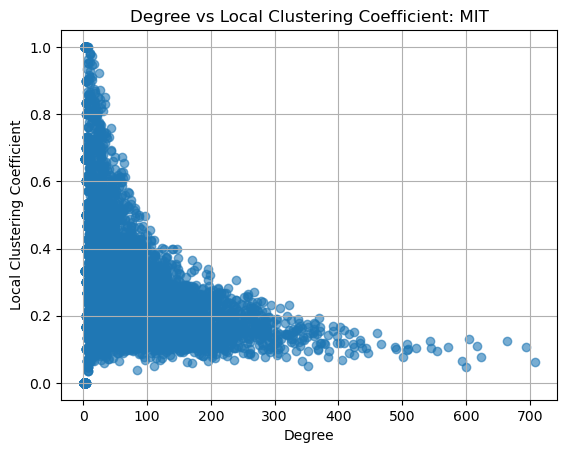

Analyzing Johns Hopkins...


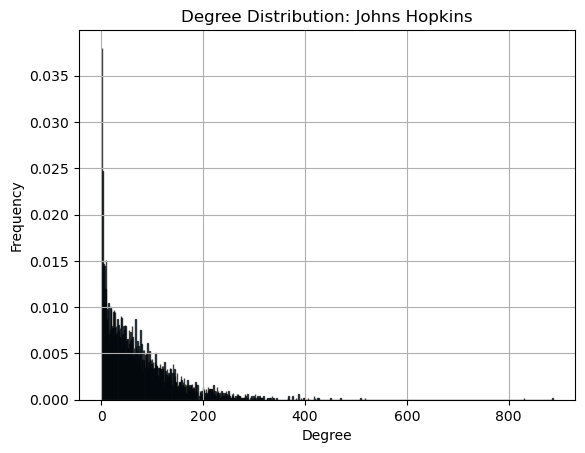

Global Clustering Coefficient: 0.19316123901594015
Mean Local Clustering Coefficient: 0.26839307371293514
Edge Density: 0.013910200162372396


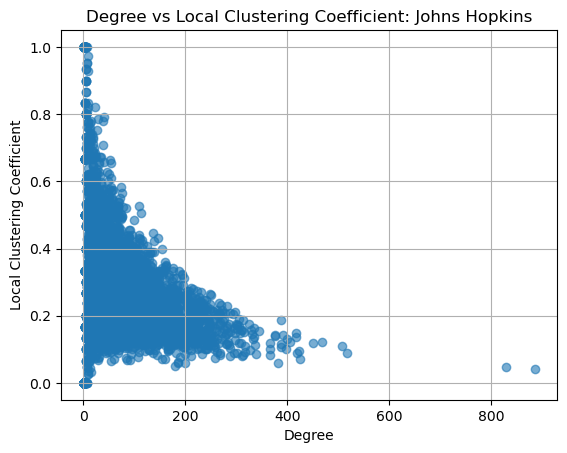

In [7]:
# Paths to the data files
data_folder_path = 'fb100/data'
caltech_path = os.path.join(data_folder_path, 'Caltech36.gml')
mit_path = os.path.join(data_folder_path, 'MIT8.gml')
johns_hopkins_path = os.path.join(data_folder_path, 'Johns Hopkins55.gml')

# Load the graphs
caltech_graph = nx.read_gml(caltech_path, label='id')
mit_graph = nx.read_gml(mit_path, label='id')
johns_hopkins_graph = nx.read_gml(johns_hopkins_path, label='id')

# Analyze each network
analyze_network(caltech_graph, "Caltech")
analyze_network(mit_graph, "MIT")
analyze_network(johns_hopkins_graph, "Johns Hopkins")


# Question 3: Assortativity Analysis with the Facebook100 Dataset

In [60]:
def load_facebook100_data(directory):
    """Load the FB100 dataset from the specified directory."""
    networks = {}
    for file in os.listdir(directory):
        if file.endswith(".gml"):
            graph = nx.read_gml(os.path.join(directory, file))
            networks[file[:-4]] = graph
    return networks

In [65]:
def compute_assortativity(networks, attribute):
    """Compute assortativity for each network based on a specific attribute."""
    results = {}
    for name, graph in networks.items():
        node_attributes = nx.get_node_attributes(graph, attribute)
        if node_attributes:
            results[name] = nx.attribute_assortativity_coefficient(graph, attribute)
        else:
            results[name] = None
    return results

In [73]:
import seaborn as sns

def plot_density(assortativities, attribute):
    """Plot density plot of assortativity results."""
    plt.figure(figsize=(10, 6))
    sns.kdeplot([a for a in assortativities if a is not None], shade=True)
    plt.axvline(0, color='black', linestyle='--')
    plt.xlabel(f'{attribute.capitalize()} Assortativity')
    plt.ylabel('Density')
    plt.title(f'Density of {attribute.capitalize()} Assortativity')
    plt.show()

In [62]:
def plot_results(network_sizes, assortativities, attribute):
    """Plot scatter plot and histogram of assortativity results."""
    # Scatter plot
    plt.figure(figsize=(10, 6))
    plt.scatter(network_sizes, assortativities, alpha=0.6)
    plt.xscale('log')
    plt.axhline(0, color='red', linestyle='--', label='No Assortativity')
    plt.xlabel('Network Size (log-scale)')
    plt.ylabel(f'{attribute.capitalize()} Assortativity')
    plt.title(f'{attribute.capitalize()} Assortativity vs Network Size')
    plt.legend()
    plt.show()

    # Histogram
    plt.figure(figsize=(10, 6))
    plt.hist([a for a in assortativities if a is not None], bins=20, alpha=0.7)
    plt.axvline(0, color='red', linestyle='--', label='No Assortativity')
    plt.xlabel(f'{attribute.capitalize()} Assortativity')
    plt.ylabel('Frequency')
    plt.title(f'Distribution of {attribute.capitalize()} Assortativity')
    plt.legend()
    plt.show()

In [63]:
# Main execution
# REEXCUATE FOR LONG TIME
data_directory = "fb100/data"  # Replace with your dataset path
fb100_networks = load_facebook100_data(data_directory)

Processing assortativity for attribute: student_fac


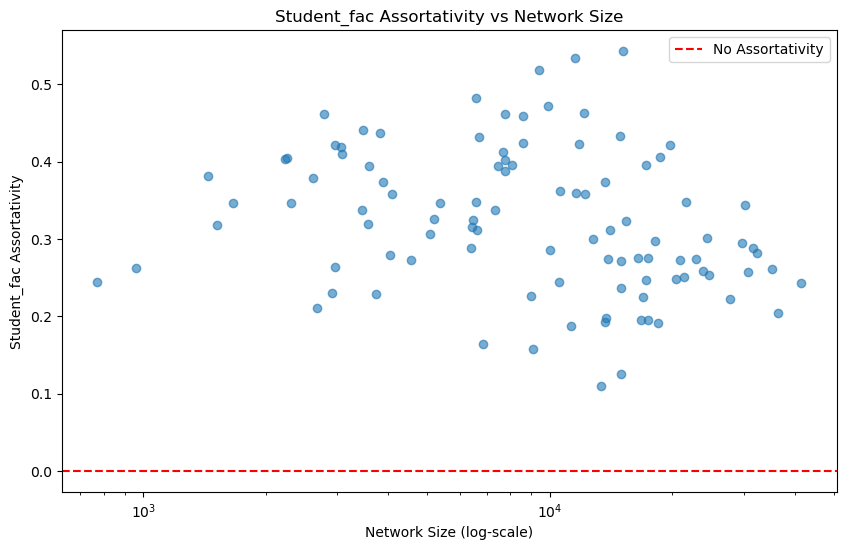

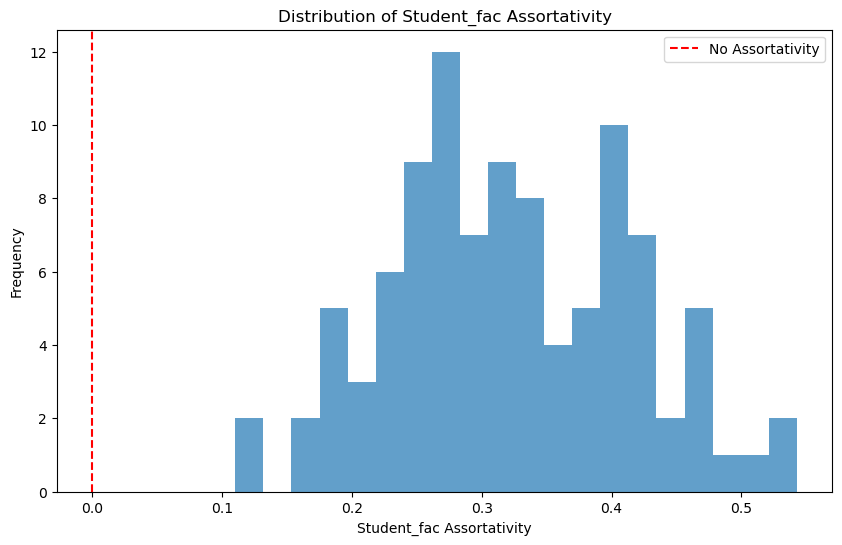

C:\Users\grace\AppData\Local\Temp\ipykernel_35668\2410825043.py:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot([a for a in assortativities if a is not None], shade=True)


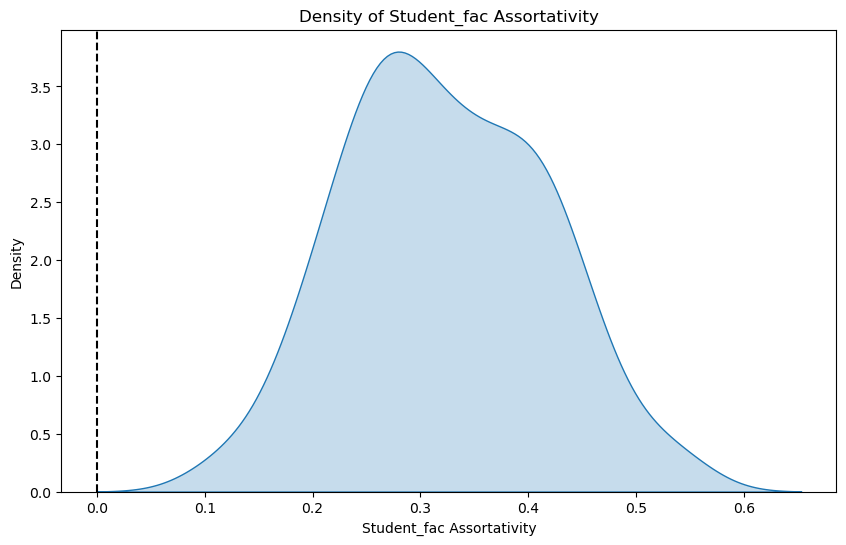

Processing assortativity for attribute: gender


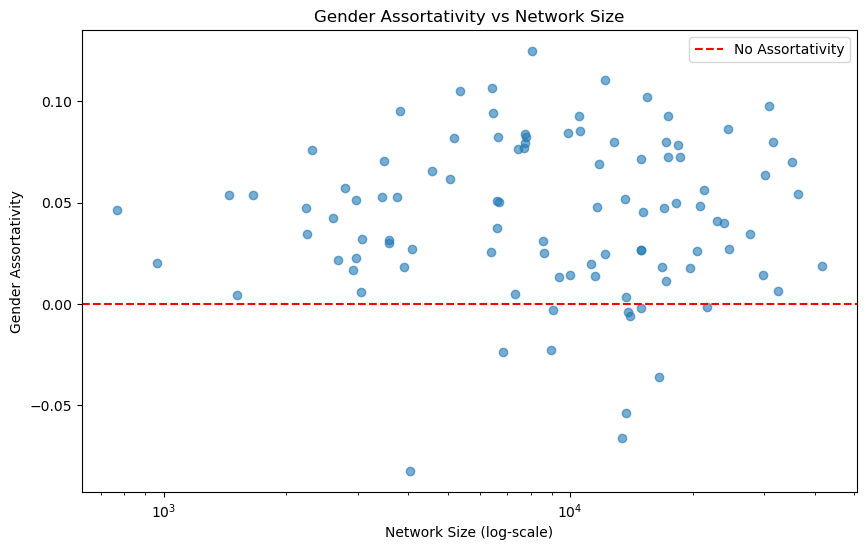

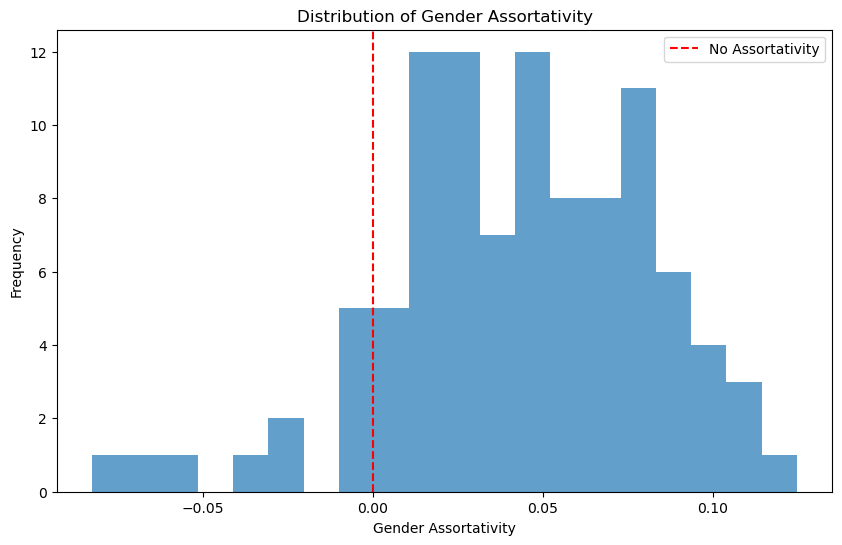

C:\Users\grace\AppData\Local\Temp\ipykernel_35668\2410825043.py:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot([a for a in assortativities if a is not None], shade=True)


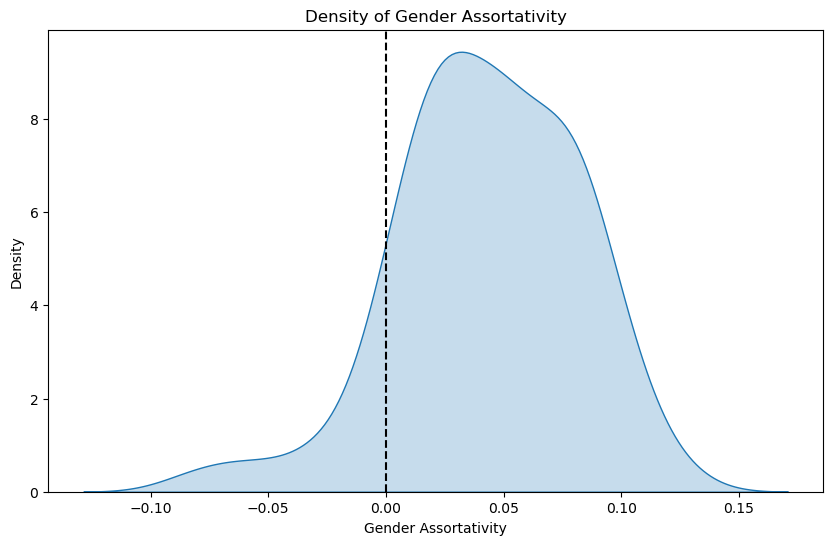

Processing assortativity for attribute: major_index


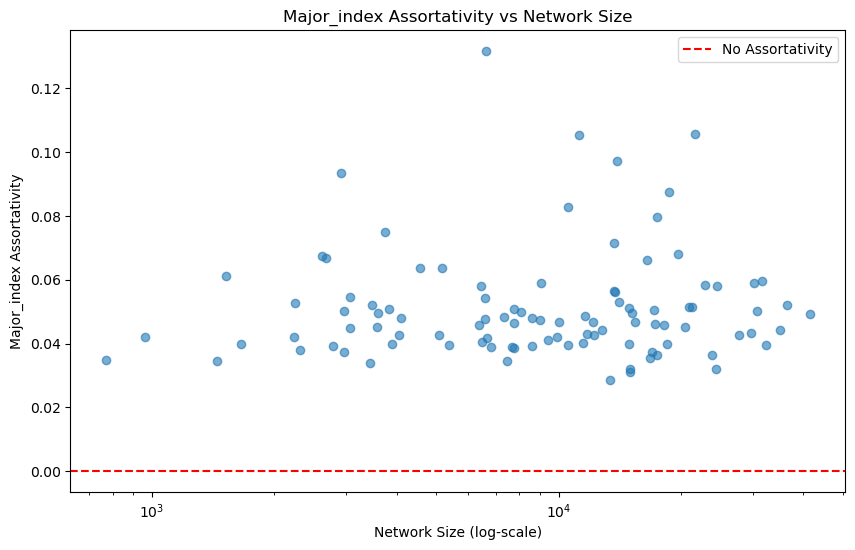

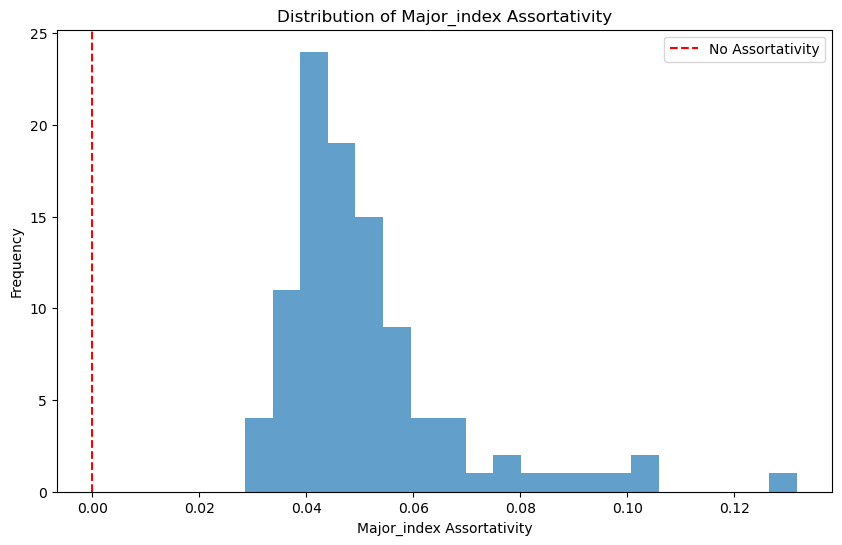

C:\Users\grace\AppData\Local\Temp\ipykernel_35668\2410825043.py:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot([a for a in assortativities if a is not None], shade=True)


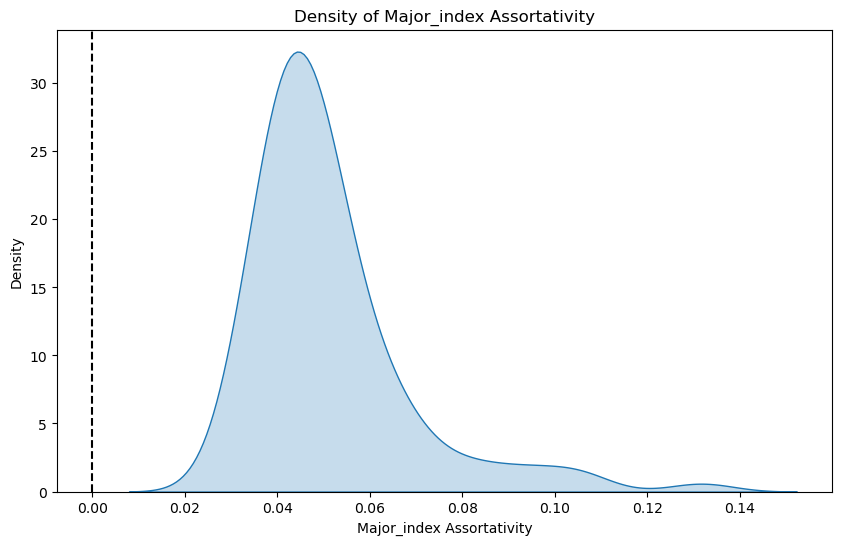

Processing assortativity for attribute: dorm


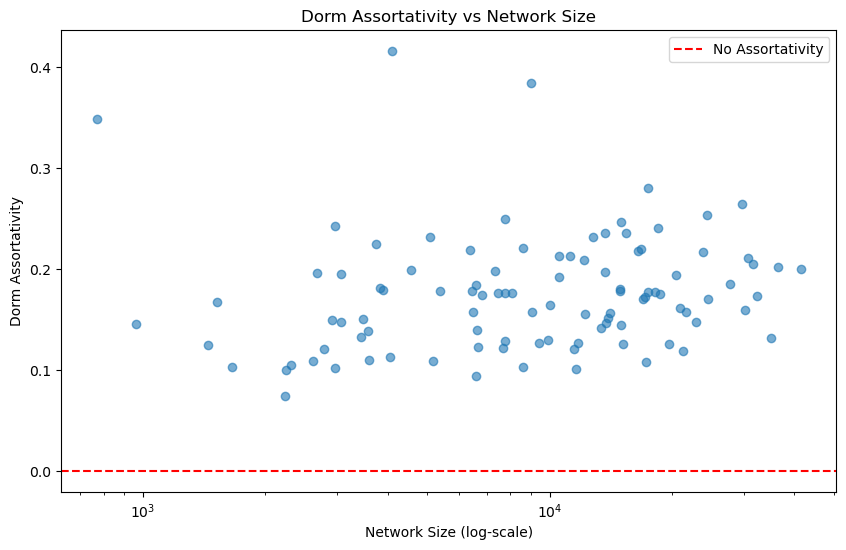

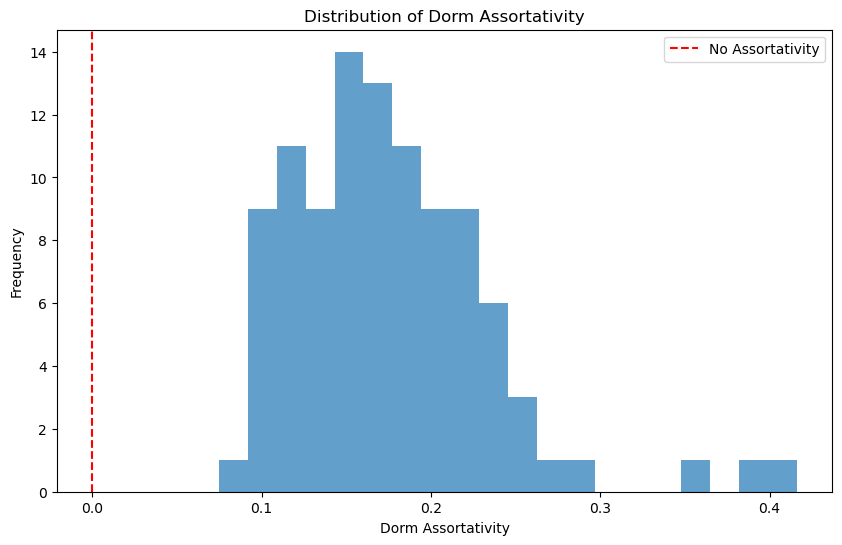

C:\Users\grace\AppData\Local\Temp\ipykernel_35668\2410825043.py:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot([a for a in assortativities if a is not None], shade=True)


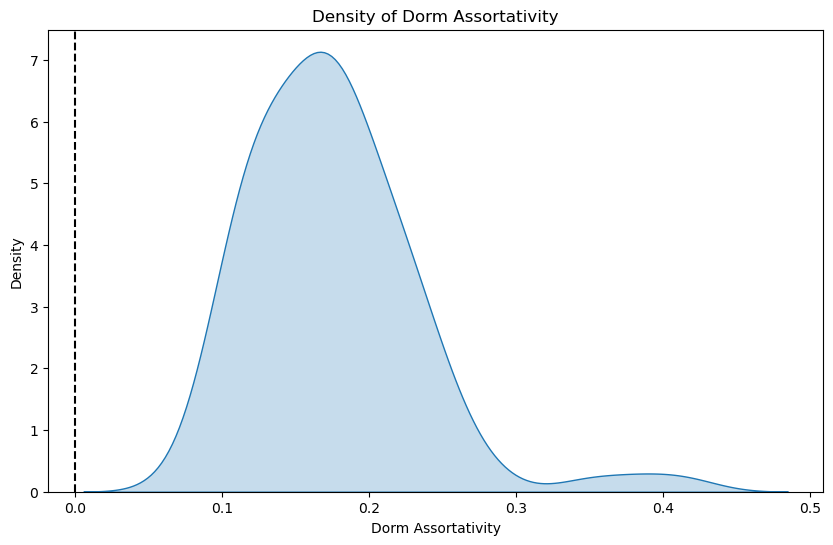

Processing assortativity for attribute: year


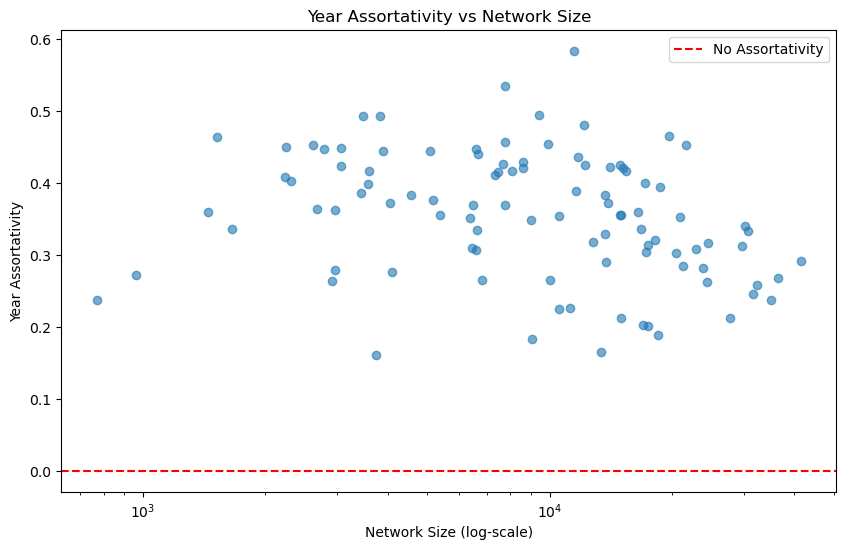

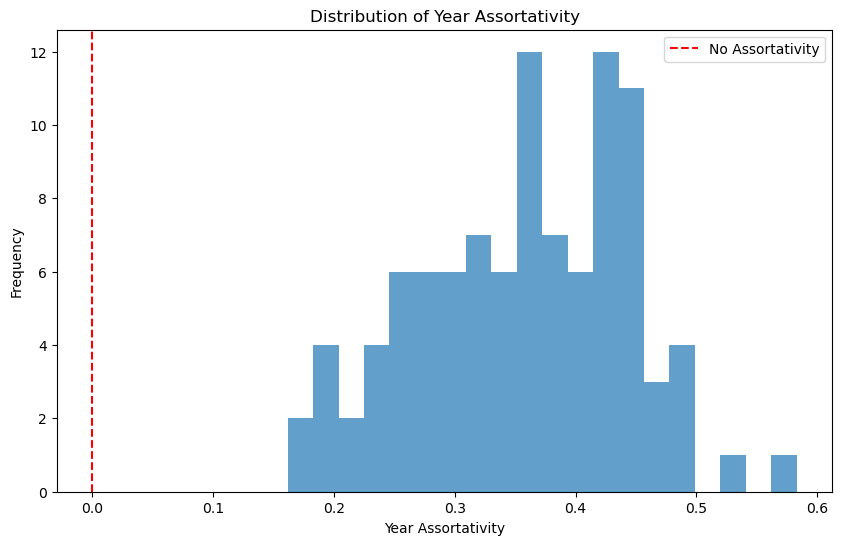

C:\Users\grace\AppData\Local\Temp\ipykernel_35668\2410825043.py:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot([a for a in assortativities if a is not None], shade=True)


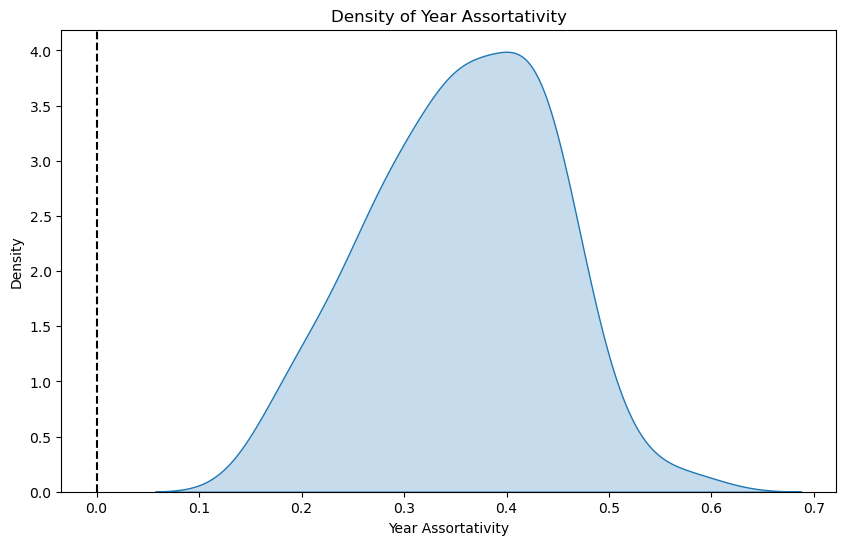

In [74]:
attributes = ['student_fac', 'gender', 'major_index', 'dorm', 'year']

# Process and plot for each attribute
for attribute in attributes:
    print(f"Processing assortativity for attribute: {attribute}")
    assortativity_results = compute_assortativity(fb100_networks, attribute)
    network_sizes = [len(graph) for graph in fb100_networks.values()]
    assortativities = list(assortativity_results.values())

    # Scatter plot of assortativity
    plot_results(network_sizes, assortativities, attribute)

    # Density plot of assortativity
    plot_density(assortativities, attribute)


In [69]:
def compute_degree_assortativity(networks):
    """Compute degree assortativity for each network.""" 
    results = {}
    for name, graph in networks.items():
        try:
            results[name] = nx.degree_assortativity_coefficient(graph)
        except Exception as e:
            results[name] = None
            print(f"Error computing degree assortativity for {name}: {e}")
    return results

Processing degree assortativity


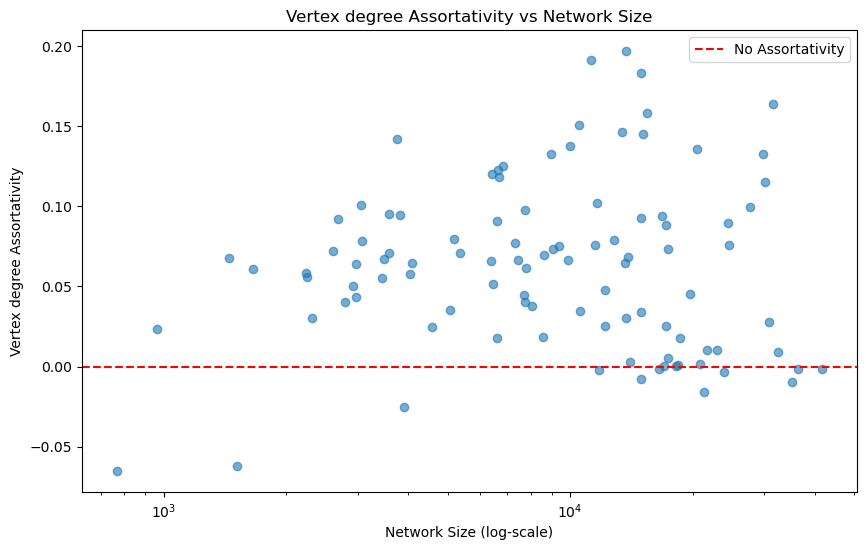

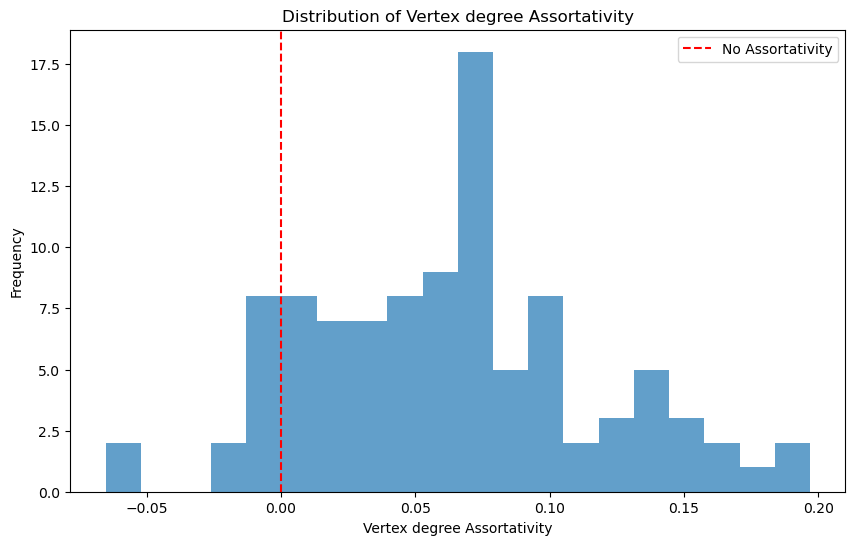

C:\Users\grace\AppData\Local\Temp\ipykernel_35668\2410825043.py:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot([a for a in assortativities if a is not None], shade=True)


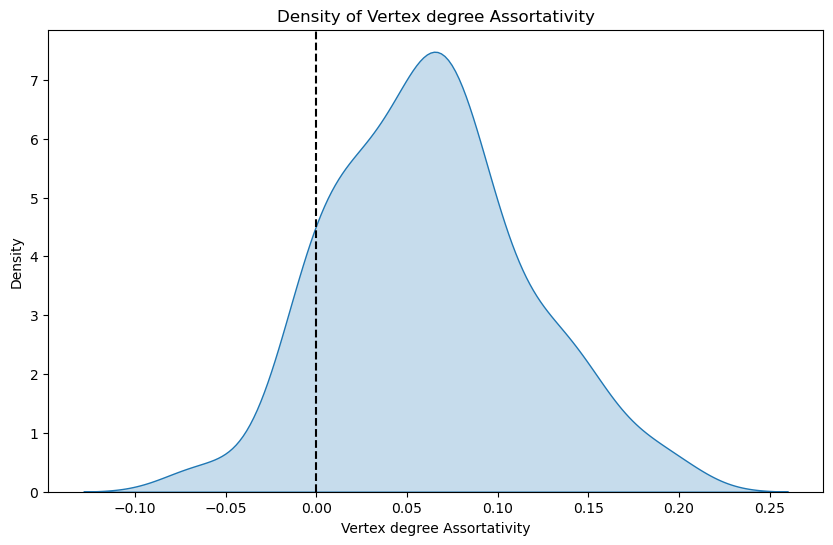

In [75]:
# Degree assortativity analysis
print("Processing degree assortativity")
degree_assortativity_results = compute_degree_assortativity(fb100_networks)
network_sizes = [len(graph) for graph in fb100_networks.values()]
degree_assortativities = list(degree_assortativity_results.values())

# Scatter plot of degree assortativity
plot_results(network_sizes, degree_assortativities, "vertex degree")

# Density plot of degree assortativity
plot_density(degree_assortativities, "vertex degree")


# Question 4: Link prediction

In [2]:
from abc import ABC, abstractmethod

class LinkPrediction(ABC):
    def __init__(self, graph):
        self.graph = graph
        self.N = len(graph)

    def neighbors(self, v):
        return list(self.graph.neighbors(v))

    @abstractmethod
    def fit(self):
        raise NotImplementedError("Fit must be implemented")

In [3]:
class CommonNeighbors(LinkPrediction):
    def __init__(self, graph):
        super(CommonNeighbors, self).__init__(graph)

    def fit(self, u, v):
        neighbors_u = set(self.neighbors(u))
        neighbors_v = set(self.neighbors(v))
        return len(neighbors_u & neighbors_v)

In [4]:
class Jaccard(LinkPrediction):
    def __init__(self, graph):
        super(Jaccard, self).__init__(graph)

    def fit(self, u, v):
        neighbors_u = set(self.neighbors(u))
        neighbors_v = set(self.neighbors(v))
        intersection = len(neighbors_u & neighbors_v)
        union = len(neighbors_u | neighbors_v)
        return intersection / union if union > 0 else 0

In [5]:
class AdamicAdar(LinkPrediction):
    def __init__(self, graph):
        super(AdamicAdar, self).__init__(graph)

    def fit(self, u, v):
        neighbors_u = set(self.neighbors(u))
        neighbors_v = set(self.neighbors(v))
        shared_neighbors = neighbors_u & neighbors_v
        return sum(1 / np.log(len(self.neighbors(w))) for w in shared_neighbors if len(self.neighbors(w)) > 1)

In [6]:
def evaluate_link_prediction(graph, link_predictor_class, removed_edges, k_values):
    predictor = link_predictor_class(graph)
    predictions = []

    for u, v in nx.non_edges(graph):
        score = predictor.fit(u, v)
        predictions.append(((u, v), score))

    predictions.sort(key=lambda x: x[1], reverse=True)

    top_k_results = {}
    for k in k_values:
        top_k_edges = {edge for edge, _ in predictions[:k]}
        true_positives = len(top_k_edges & removed_edges)
        precision = true_positives / k
        recall = true_positives / len(removed_edges)
        top_k_results[k] = {
            "Precision": precision,
            "Recall": recall
        }

    return top_k_results


In [7]:
def load_fb100_graph(file_path):
    """
    Load a graph from an FB100 dataset .gml file.

    Parameters
    ----------
    file_path : str
        Path to the .gml file containing the FB100 graph.

    Returns
    -------
    G : networkx.Graph
        A NetworkX graph constructed from the .gml file.
    """
    G = nx.read_gml(file_path, label='id')
    return G

In [10]:

# Load graph from FB100 dataset .gml file
file_path = "fb100/data/Caltech36.gml"  
graph = load_fb100_graph(file_path)

# Randomly remove a fraction of edges
fraction = 0.1
edges = list(graph.edges())
np.random.shuffle(edges)
num_removed = int(fraction * len(edges))
removed_edges = set(edges[:num_removed])
graph.remove_edges_from(removed_edges)

# Evaluate link predictors
k_values = [50, 100, 200, 400]
print("Evaluating Common Neighbors")
results_cn = evaluate_link_prediction(graph, CommonNeighbors, removed_edges, k_values)
print(results_cn)

print("Evaluating Jaccard")
results_jaccard = evaluate_link_prediction(graph, Jaccard, removed_edges, k_values)
print(results_jaccard)

print("Evaluating Adamic/Adar")
results_adamic_adar = evaluate_link_prediction(graph, AdamicAdar, removed_edges, k_values)
print(results_adamic_adar)

Evaluating Common Neighbors
{50: {'Precision': 0.6, 'Recall': 0.018018018018018018}, 100: {'Precision': 0.52, 'Recall': 0.03123123123123123}, 200: {'Precision': 0.46, 'Recall': 0.05525525525525526}, 400: {'Precision': 0.385, 'Recall': 0.09249249249249249}}
Evaluating Jaccard
{50: {'Precision': 0.28, 'Recall': 0.008408408408408409}, 100: {'Precision': 0.3, 'Recall': 0.018018018018018018}, 200: {'Precision': 0.415, 'Recall': 0.04984984984984985}, 400: {'Precision': 0.38, 'Recall': 0.0912912912912913}}
Evaluating Adamic/Adar
{50: {'Precision': 0.6, 'Recall': 0.018018018018018018}, 100: {'Precision': 0.53, 'Recall': 0.03183183183183183}, 200: {'Precision': 0.485, 'Recall': 0.058258258258258255}, 400: {'Precision': 0.39, 'Recall': 0.0936936936936937}}


In [8]:

# Load graph from FB100 dataset .gml file
file_path = "fb100/data/MIT8.gml"  
graph = load_fb100_graph(file_path)

# Randomly remove a fraction of edges
fraction = 0.1
edges = list(graph.edges())
np.random.shuffle(edges)
num_removed = int(fraction * len(edges))
removed_edges = set(edges[:num_removed])
graph.remove_edges_from(removed_edges)

# Evaluate link predictors
k_values = [50, 100, 200, 400]
print("Evaluating Common Neighbors")
results_cn = evaluate_link_prediction(graph, CommonNeighbors, removed_edges, k_values)
print(results_cn)

print("Evaluating Jaccard")
results_jaccard = evaluate_link_prediction(graph, Jaccard, removed_edges, k_values)
print(results_jaccard)

print("Evaluating Adamic/Adar")
results_adamic_adar = evaluate_link_prediction(graph, AdamicAdar, removed_edges, k_values)
print(results_adamic_adar)


Evaluating Common Neighbors
{50: {'Precision': 0.78, 'Recall': 0.0015522388059701492}, 100: {'Precision': 0.79, 'Recall': 0.0031442786069651742}, 200: {'Precision': 0.75, 'Recall': 0.005970149253731343}, 400: {'Precision': 0.69, 'Recall': 0.010985074626865671}}
Evaluating Jaccard
{50: {'Precision': 0.2, 'Recall': 0.0003980099502487562}, 100: {'Precision': 0.34, 'Recall': 0.0013532338308457712}, 200: {'Precision': 0.295, 'Recall': 0.0023482587064676615}, 400: {'Precision': 0.3725, 'Recall': 0.005930348258706468}}
Evaluating Adamic/Adar
{50: {'Precision': 0.8, 'Recall': 0.0015920398009950248}, 100: {'Precision': 0.79, 'Recall': 0.0031442786069651742}, 200: {'Precision': 0.76, 'Recall': 0.006049751243781094}, 400: {'Precision': 0.72, 'Recall': 0.01146268656716418}}


In [11]:

# Load graph from FB100 dataset .gml file
file_path = "fb100/data/Johns Hopkins55.gml"  
graph = load_fb100_graph(file_path)

# Randomly remove a fraction of edges
fraction = 0.1
edges = list(graph.edges())
np.random.shuffle(edges)
num_removed = int(fraction * len(edges))
removed_edges = set(edges[:num_removed])
graph.remove_edges_from(removed_edges)

# Evaluate link predictors
k_values = [50, 100, 200, 400]
print("Evaluating Common Neighbors")
results_cn = evaluate_link_prediction(graph, CommonNeighbors, removed_edges, k_values)
print(results_cn)

print("Evaluating Jaccard")
results_jaccard = evaluate_link_prediction(graph, Jaccard, removed_edges, k_values)
print(results_jaccard)

print("Evaluating Adamic/Adar")
results_adamic_adar = evaluate_link_prediction(graph, AdamicAdar, removed_edges, k_values)
print(results_adamic_adar)

Evaluating Common Neighbors
{50: {'Precision': 0.8, 'Recall': 0.002143852502947797}, 100: {'Precision': 0.73, 'Recall': 0.00391253081787973}, 200: {'Precision': 0.695, 'Recall': 0.007449887447743595}, 400: {'Precision': 0.675, 'Recall': 0.014471004394897631}}
Evaluating Jaccard
{50: {'Precision': 0.2, 'Recall': 0.0005359631257369493}, 100: {'Precision': 0.45, 'Recall': 0.002411834065816272}, 200: {'Precision': 0.51, 'Recall': 0.0054668238825168825}, 400: {'Precision': 0.465, 'Recall': 0.009968914138707256}}
Evaluating Adamic/Adar
{50: {'Precision': 0.76, 'Recall': 0.002036659877800407}, 100: {'Precision': 0.7, 'Recall': 0.003751741880158645}, 200: {'Precision': 0.675, 'Recall': 0.0072355021974488155}, 400: {'Precision': 0.67, 'Recall': 0.014363811769750242}}


# Question 5: Find missing labels with the label propagation algorithms

In [14]:
from sklearn.metrics import accuracy_score, mean_absolute_error

class LabelPropagation:
    def __init__(self, graph):
        self.graph = graph
        
    def propagate_labels(self, labels, max_iter=100):
        """
        Perform label propagation.

        Parameters:
        labels: numpy array with initial labels (use -1 for unlabeled nodes)
        max_iter: maximum number of iterations

        Returns:
        numpy array with final labels
        """
        nodes = list(self.graph.nodes())
        n = len(nodes)
        label_matrix = np.zeros((n, labels.max() + 1))
        
        # Initialize label matrix
        for i, label in enumerate(labels):
            if label != -1:
                label_matrix[i, label] = 1
        
        adj_matrix = nx.to_numpy_array(self.graph)

        for _ in range(max_iter):
            label_matrix = np.dot(adj_matrix, label_matrix)
            label_matrix /= label_matrix.sum(axis=1, keepdims=True)
            
        propagated_labels = label_matrix.argmax(axis=1)
        return propagated_labels

    def evaluate(self, true_labels, predicted_labels):
        """
        Evaluate the accuracy and mean absolute error.

        Parameters:
        true_labels: numpy array of true labels
        predicted_labels: numpy array of predicted labels

        Returns:
        accuracy, mean absolute error
        """
        mask = true_labels != -1
        true = true_labels[mask]
        pred = predicted_labels[mask]
        
        accuracy = accuracy_score(true, pred)
        mae = mean_absolute_error(true, pred)
        
        return accuracy, mae

In [15]:
import random

# Directory containing the .gml files
gml_folder_path = "fb100\data"

# List all .gml files in the folder
gml_files = [f for f in os.listdir(gml_folder_path) if f.endswith('.gml')]

# Randomly select 10 .gml files
selected_files = random.sample(gml_files, 10)

In [16]:
# Load the graphs and perform label propagation for selected files
results = []
for file in selected_files:
    file_path = os.path.join(gml_folder_path, file)
    graph = nx.read_edgelist(file_path)
    print(f"Processing {file}...")

    # Assign random labels to nodes
    attributes = np.array([random.randint(0, 3) for _ in range(len(graph))])  # Example: 4 unique labels
    print(f"Attributes: {attributes}")
    
    # Remove a percentage of attributes
    missing_fraction = 0.2
    mask = np.random.rand(len(attributes)) > missing_fraction
    partial_labels = np.where(mask, attributes, -1)

    # Run label propagation
    lp = LabelPropagation(graph)
    predicted_labels = lp.propagate_labels(partial_labels)

    # Evaluate results
    accuracy, mae = lp.evaluate(attributes, predicted_labels)
    print(f"Accuracy: {accuracy}, Mean Absolute Error: {mae}")


Processing American75.gml...
Attributes: [2 3 0 ... 2 0 2]
Accuracy: 0.25453466130202496, Mean Absolute Error: 1.4811028296286524
Processing Wellesley22.gml...
Attributes: [3 3 3 ... 0 3 3]
Accuracy: 0.25390463026952315, Mean Absolute Error: 1.4852798894263994
Processing GWU54.gml...
Attributes: [0 3 3 ... 3 2 2]
Accuracy: 0.2493553088911313, Mean Absolute Error: 1.4992712187464963
Processing USFCA72.gml...
Attributes: [0 3 2 ... 3 1 3]
Accuracy: 0.2562664907651715, Mean Absolute Error: 1.4820250659630607
Processing Temple83.gml...
Attributes: [3 3 1 ... 0 0 1]
Accuracy: 0.24643164230438522, Mean Absolute Error: 1.5097162510748066
Processing JMU79.gml...
Attributes: [0 1 0 ... 0 2 0]
Accuracy: 0.2502951593860685, Mean Absolute Error: 1.5008939112835216
Processing Oklahoma97.gml...
Attributes: [1 2 2 ... 3 3 1]
Accuracy: 0.2519045904091753, Mean Absolute Error: 1.5021192896916642
Processing UC33.gml...
Attributes: [2 2 3 ... 2 1 3]
Accuracy: 0.24958915365653245, Mean Absolute Error: 1.5

In [17]:
from sklearn.metrics import accuracy_score, mean_absolute_error, f1_score
import torch
from torch.nn.functional import one_hot

class LabelPropagation:
    def __init__(self, graph):
        self.graph = graph
        
    def propagate_labels(self, labels, max_iter=100):
        """
        Perform label propagation using PyTorch for matrix operations.

        Parameters:
        labels: numpy array with initial labels (use -1 for unlabeled nodes)
        max_iter: maximum number of iterations

        Returns:
        numpy array with final labels
        """
        nodes = list(self.graph.nodes())
        n = len(nodes)
        num_classes = labels.max() + 1

        # Initialize label matrix with PyTorch
        label_matrix = torch.zeros((n, num_classes), dtype=torch.float32)
        for i, label in enumerate(labels):
            if label != -1:
                label_matrix[i, label] = 1.0

        # Convert adjacency matrix to PyTorch tensor
        adj_matrix = torch.tensor(nx.to_numpy_array(self.graph), dtype=torch.float32)

        for _ in range(max_iter):
            # Propagate labels using matrix multiplication
            label_matrix = torch.matmul(adj_matrix, label_matrix)

            # Normalize rows to prevent exploding values
            row_sums = label_matrix.sum(dim=1, keepdim=True)
            row_sums[row_sums == 0] = 1  # Avoid division by zero
            label_matrix = label_matrix / row_sums

        propagated_labels = torch.argmax(label_matrix, dim=1).numpy()
        return propagated_labels

    def evaluate(self, true_labels, predicted_labels):
        """
        Evaluate the accuracy and mean absolute error.

        Parameters:
        true_labels: numpy array of true labels
        predicted_labels: numpy array of predicted labels

        Returns:
        accuracy, mean absolute error
        """
        mask = true_labels != -1
        true = true_labels[mask]
        pred = predicted_labels[mask]
        
        accuracy = accuracy_score(true, pred)
        mae = mean_absolute_error(true, pred)
        f1 = f1_score(true, pred, average='weighted')  # Weighted F1-score for imbalanced classes
        
        return accuracy, mae, f1


In [18]:
# Load the graph
fb_graph_path = "fb100/data/Princeton12.gml"
graph = nx.read_edgelist(fb_graph_path)

# Attributes to test
attributes_dict = {
    "dorm": np.array([random.randint(0, 4) for _ in range(len(graph))]),  # Example: 5 unique dorms
    "major": np.array([random.randint(0, 10) for _ in range(len(graph))]),  # Example: 11 unique majors
    "gender": np.array([random.randint(0, 1) for _ in range(len(graph))]),  # Example: 2 unique genders
    "year": np.array([random.randint(0, 3) for _ in range(len(graph))])  # Example: 4 unique years
}

# Fractions to remove
fractions = [0.1, 0.2, 0.3, 0.4]

results = []

for attr_name, attributes in attributes_dict.items():
    for fraction in fractions:
        mask = np.random.rand(len(attributes)) > fraction
        partial_labels = np.where(mask, attributes, -1)

        # Run label propagation
        lp = LabelPropagation(graph)
        predicted_labels = lp.propagate_labels(partial_labels)

        # Evaluate results
        accuracy, mae, f1 = lp.evaluate(attributes, predicted_labels)
        results.append((attr_name, fraction, accuracy, mae, f1))
        print(f"Attribute: {attr_name}, Missing Fraction: {fraction}, Accuracy: {accuracy}, MAE: {mae}, F1-Score: {f1}")




Attribute: dorm, Missing Fraction: 0.1, Accuracy: 0.20595898189591824, MAE: 1.7188856971073552, F1-Score: 0.11880104630215257
Attribute: dorm, Missing Fraction: 0.2, Accuracy: 0.20575856770659362, MAE: 1.28104749816287, F1-Score: 0.11869483838380698
Attribute: dorm, Missing Fraction: 0.3, Accuracy: 0.20368762108357272, MAE: 1.7219587146769992, F1-Score: 0.11697586738448555
Attribute: dorm, Missing Fraction: 0.4, Accuracy: 0.20569176297681876, MAE: 1.2813147170819694, F1-Score: 0.11856030879737696
Attribute: major, Missing Fraction: 0.1, Accuracy: 0.09646602979490948, MAE: 3.216580933930122, F1-Score: 0.030964903052231582
Attribute: major, Missing Fraction: 0.2, Accuracy: 0.09720088182243303, MAE: 4.622486472042221, F1-Score: 0.030476756649720972
Attribute: major, Missing Fraction: 0.3, Accuracy: 0.09619881087581, MAE: 4.024517335827377, F1-Score: 0.03056685587984571
Attribute: major, Missing Fraction: 0.4, Accuracy: 0.0974681007415325, MAE: 3.8145500701449664, F1-Score: 0.0308748038221

In [19]:
# Display results
import pandas as pd
results_df = pd.DataFrame(results, columns=["Attribute", "Missing Fraction", "Accuracy", "MAE", "F1-Score"])
results_df

,Attribute,Missing Fraction,Accuracy,MAE,F1-Score
0,dorm,0.1,0.205959,1.718886,0.118801
1,dorm,0.2,0.205759,1.281047,0.118695
2,dorm,0.3,0.203688,1.721959,0.116976
3,dorm,0.4,0.205692,1.281315,0.118560
4,major,0.1,0.096466,3.216581,0.030965
5,major,0.2,0.097201,4.622486,0.030477
6,major,0.3,0.096199,4.024517,0.030567
7,major,0.4,0.097468,3.814550,0.030875
8,gender,0.1,0.509720,0.490280,0.508039
9,gender,0.2,0.502038,0.497962,0.335674


# Question 6: Communities detection with the FB100 datasets

In [2]:
import scipy.io as sio
import community as community_louvain  # Louvain algorithm
import leidenalg
import igraph as ig
from collections import defaultdict
from sklearn.metrics import homogeneity_score
import warnings
import random

warnings.filterwarnings("ignore")

# def load_fb100_graph(gml_file_path):
#     G = nx.read_gml(gml_file_path)
#     return G

In [3]:
def load_fb100_graphs_from_directory(directory, num_files=5):
    """
    Randomly loads a specified number of FB100 networks (in .gml format) from the given directory.
    Returns a dictionary: { 'network_name': NetworkX graph }
    """
    all_files = [file for file in os.listdir(directory) if file.endswith(".gml")]
    selected_files = random.sample(all_files, num_files)  # Randomly select files

    networks = {}
    for file in selected_files:
        gml_path = os.path.join(directory, file)
        try:
            graph = nx.read_gml(gml_path)
            network_name = file[:-4]  # Remove '.gml' extension
            networks[network_name] = graph
        except Exception as e:
            print(f"Error loading {file}: {e}")
    return networks

In [4]:
def detect_communities_louvain(G):
    """
    Given a NetworkX graph G, run the Louvain community detection.
    Returns a dictionary: node -> community_index
    """
    # best_partition returns a dict: node -> community id
    partition = community_louvain.best_partition(G)
    return partition

In [5]:
from networkx.algorithms.community import girvan_newman

def detect_communities_girvan_newman(G, num_communities=5):
    """
    Detect communities using the Girvan-Newman algorithm.
    Returns a dictionary: node -> community_id
    """
    
    communities_generator = girvan_newman(G)
    limited = []
    try:
        for communities in communities_generator:
            limited = communities
            if len(limited) >= num_communities:
                break
    except:
        pass
    partition = {}
    for idx, community in enumerate(limited):
        for node in community:
            partition[node] = idx
    return partition

In [6]:
def detect_communities_leiden(G):
    """
    Detect communities using the Leiden algorithm.
    Returns a dictionary: node -> community_id
    """
    # Convert NetworkX graph to igraph
    ig_graph = ig.Graph.from_networkx(G)
    # Apply Leiden algorithm
    partition = leidenalg.find_partition(ig_graph, leidenalg.ModularityVertexPartition)
    # Map back to node IDs
    node_to_comm = {node: comm for node, comm in zip(G.nodes(), partition.membership)}
    return node_to_comm

In [7]:
def compute_modularity_louvain(G, partition):
    """
    Compute modularity using Louvain's partition.
    """
    return community_louvain.modularity(partition, G)

In [8]:
def compute_modularity_leiden(G, partition):
    """
    Compute modularity using Leiden's partition.
    """
    # Leiden algorithm already optimizes modularity, but we can compute it
    modularity = leidenalg.ModularityVertexPartition(G, membership=list(partition.values())).modularity
    return modularity

In [9]:
def analyze_homogeneity(G, partition, attribute):
    """
    Analyze homogeneity of a given attribute within communities.
    Returns the average homogeneity score across all communities.
    """
    # Create a list where index is node and value is community
    communities = defaultdict(list)
    for node, comm in partition.items():
        communities[comm].append(node)
    
    homogeneity_scores = []
    for comm, nodes in communities.items():
        # Extract attribute values
        attr_values = [G.nodes[node][attribute] for node in nodes if attribute in G.nodes[node]]
        if len(attr_values) < 2:
            continue  # Homogeneity is not defined for a single element
        # Calculate the most common attribute in the community
        most_common = max(set(attr_values), key=attr_values.count)
        # Calculate homogeneity: proportion of nodes with the most common attribute
        homogeneity = attr_values.count(most_common) / len(attr_values)
        homogeneity_scores.append(homogeneity)
    
    # Return average homogeneity across all communities
    if homogeneity_scores:
        return sum(homogeneity_scores) / len(homogeneity_scores)
    else:
        return 0


In [10]:

# Directory containing FB100 .gml files
fb100_directory = "fb100/data"  # Update this path as needed

# Load networks
networks = load_fb100_graphs_from_directory(fb100_directory)
print(f"Loaded {len(networks)} FB100 networks.\n")

# Select a subset of networks for demonstration (e.g., first 5)
selected_networks = list(networks.keys())[:5]

# Prepare a DataFrame to store results
results = []

for net_name in selected_networks:
    G = networks[net_name]
    print(f"Analyzing Network: {net_name}")
    print(f" - Nodes: {G.number_of_nodes()}, Edges: {G.number_of_edges()}")
    
    # Ensure necessary attributes exist
    if not all(attr in G.nodes[next(iter(G.nodes()))] for attr in ['major_index', 'year']):
        print(" - Skipping due to missing 'major_index' or 'year' attributes.\n")
        continue
    
    
    # Apply Louvain algorithm
    partition = detect_communities_louvain(G)
    modularity = compute_modularity_louvain(G, partition)
    homogeneity_major = analyze_homogeneity(G, partition, 'major_index')
    homogeneity_year = analyze_homogeneity(G, partition, 'year')

    results.append({
        'Network': net_name,
        'Modularity': modularity,
        'Homogeneity_Major': homogeneity_major,
        'Homogeneity_Year': homogeneity_year,
        'Num_Communities': len(set(partition.values()))
    })


Loaded 5 FB100 networks.

Analyzing Network: Trinity100
 - Nodes: 2613, Edges: 111996
Analyzing Network: Carnegie49
 - Nodes: 6637, Edges: 249967
Analyzing Network: Mississippi66
 - Nodes: 10521, Edges: 610911
Analyzing Network: Rutgers89
 - Nodes: 24580, Edges: 784602
Analyzing Network: Duke14
 - Nodes: 9895, Edges: 506442


In [11]:
import pandas as pd
import seaborn as sns

# Convert results to DataFrame for better visualization
df_results = pd.DataFrame(results)

# Save the DataFrame as CSV for download
output_path = 'Louvain_Community_Detection_Results.csv'
df_results.to_csv(output_path, index=False)


print("=== Summary of Results ===\n")
df_results


=== Summary of Results ===



,Network,Modularity,Homogeneity_Major,Homogeneity_Year,Num_Communities
0,Trinity100,0.451738,0.260709,0.692033,6
1,Carnegie49,0.432436,0.497113,0.592802,20
2,Mississippi66,0.422359,0.268191,0.375344,10
3,Rutgers89,0.476598,0.347085,0.529916,17
4,Duke14,0.464492,0.485337,0.692277,18


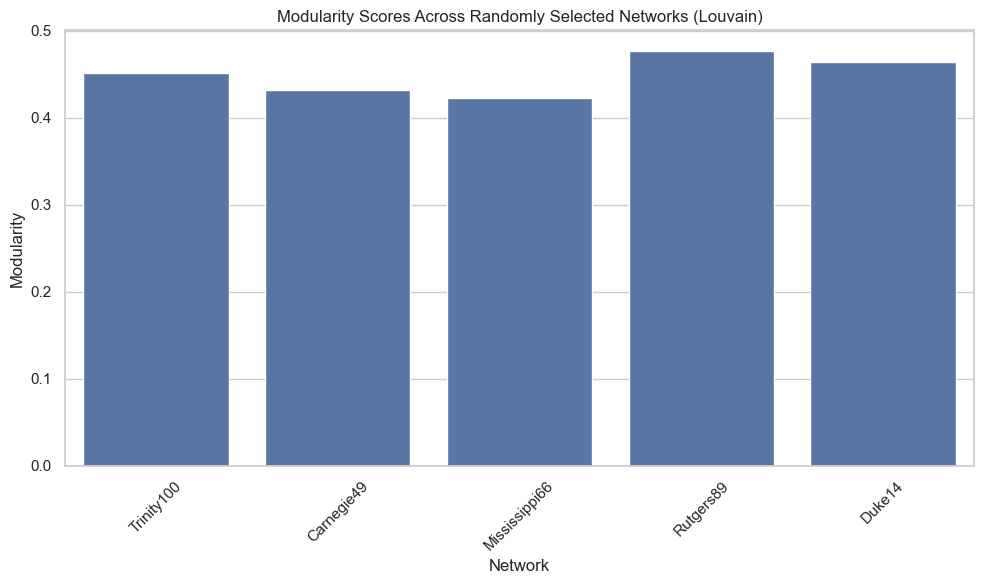

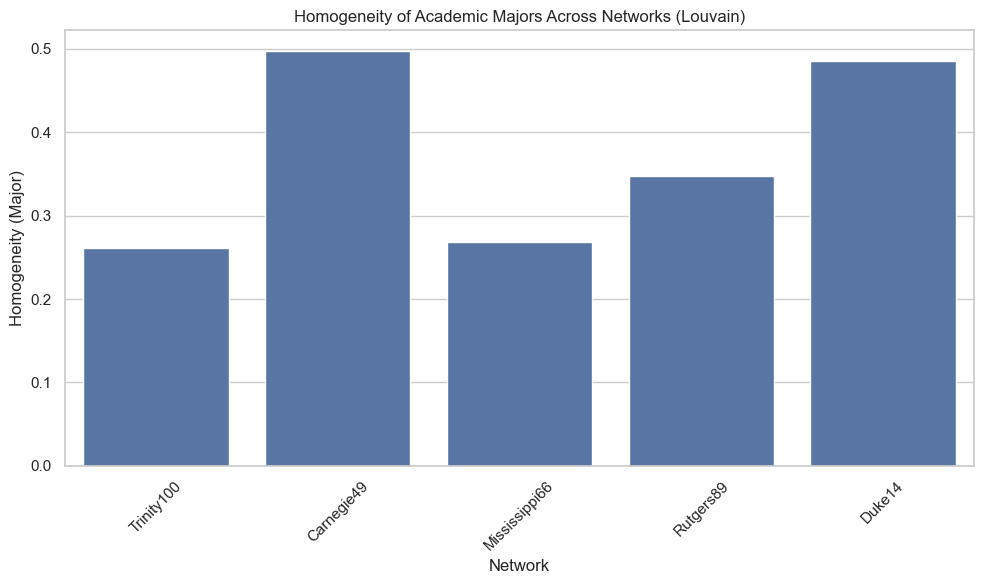

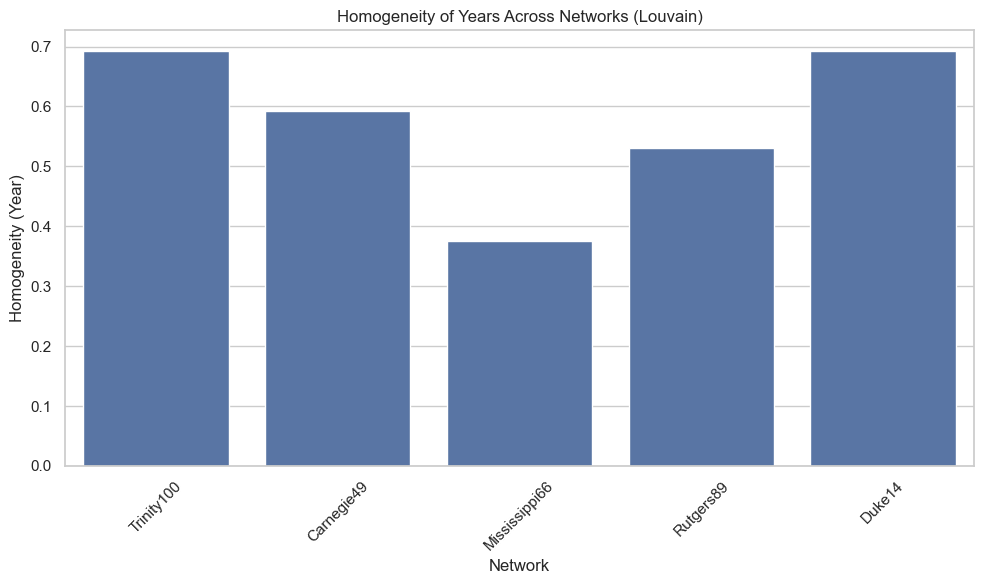

In [13]:

sns.set(style="whitegrid")

# Plot Modularity Scores
plt.figure(figsize=(10, 6))
sns.barplot(x='Network', y='Modularity', data=df_results)
plt.title('Modularity Scores Across Randomly Selected Networks (Louvain)')
plt.ylabel('Modularity')
plt.xlabel('Network')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Plot Homogeneity Scores for Major
plt.figure(figsize=(10, 6))
sns.barplot(x='Network', y='Homogeneity_Major', data=df_results)
plt.title('Homogeneity of Academic Majors Across Networks (Louvain)')
plt.ylabel('Homogeneity (Major)')
plt.xlabel('Network')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Plot Homogeneity Scores for Dorm
plt.figure(figsize=(10, 6))
sns.barplot(x='Network', y='Homogeneity_Year', data=df_results)
plt.title('Homogeneity of Years Across Networks (Louvain)')
plt.ylabel('Homogeneity (Year)')
plt.xlabel('Network')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

